<a href="https://colab.research.google.com/github/Saliyan-moksh081/AeroFit_Bussiness_case/blob/master/Aerofit_businessCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Loas the test case data set

In [ ]:
df = pd.read_csv('/content/aerofit_treadmill.csv')
df.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


Data cleaning for data visualize and analytics

In [ ]:
datadf = df.rename(columns={'Education':'EducationYears', 'Usage':'AvgUsage_inWeek'}, inplace=False)
datadf.head()


,Product,Age,Gender,EducationYears,MaritalStatus,AvgUsage_inWeek,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


check for null values , Check for the structure of the data, describe the data
and check for the unique values!

In [ ]:
print(datadf.isnull().sum())
print(datadf.info())
print(datadf.describe())
#check for the unique values
print(datadf.nunique())
#check for the unique values in categorical columns
category_columns = ['Product','Gender','MaritalStatus']
for columns in category_columns:
  print(datadf[columns].value_counts())



Product            0
Age                0
Gender             0
EducationYears     0
MaritalStatus      0
AvgUsage_inWeek    0
Fitness            0
Income             0
Miles              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product          180 non-null    object
 1   Age              180 non-null    int64 
 2   Gender           180 non-null    object
 3   EducationYears   180 non-null    int64 
 4   MaritalStatus    180 non-null    object
 5   AvgUsage_inWeek  180 non-null    int64 
 6   Fitness          180 non-null    int64 
 7   Income           180 non-null    int64 
 8   Miles            180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None
              Age  EducationYears  AvgUsage_inWeek     Fitness         Income  \
count  180.000000      180.000000       180.000000  180.000000

Data Analyzation starts

1. Distribution of customers across the three treadmill products (KP281, KP481, KP781)

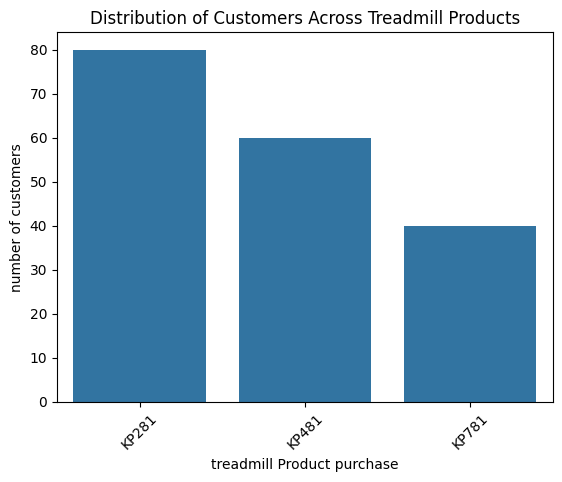

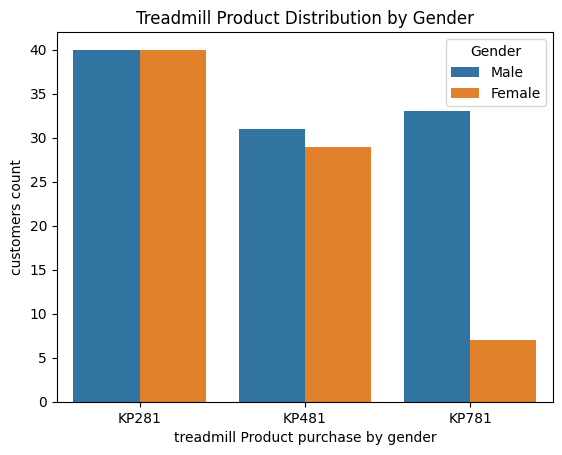


Distribution of Treadmill Products:
 Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


In [ ]:
# Univariate: Distribution of treadmill products over different ages
sns.countplot(x='Product', data=datadf)
plt.title('Distribution of Customers Across Treadmill Products')
plt.xlabel('treadmill Product purchase')
plt.ylabel('number of customers')
plt.xticks(rotation=45)
plt.show()

# Bivariate: Treadmill products vs Gender
sns.countplot(x='Product', hue='Gender', data=datadf)
plt.title('Treadmill Product Distribution by Gender')
plt.xlabel('treadmill Product purchase by gender')
plt.ylabel('customers count')
plt.show()

# Frequency distribution (table)
product_distribution = datadf['Product'].value_counts()
print("\nDistribution of Treadmill Products:\n", product_distribution)

This analysis shows that the the number of customers that buy the KP281 treadmills are more in number and Kp781 is the least as its expensive.
Secondly the number of purchases for kp281 is similar for both genders and the male purchase for KP781 is more compared to female purchase.

Recommending KP781 more to males and KP281 to females

2. How does the average age of customers vary for each treadmill model?

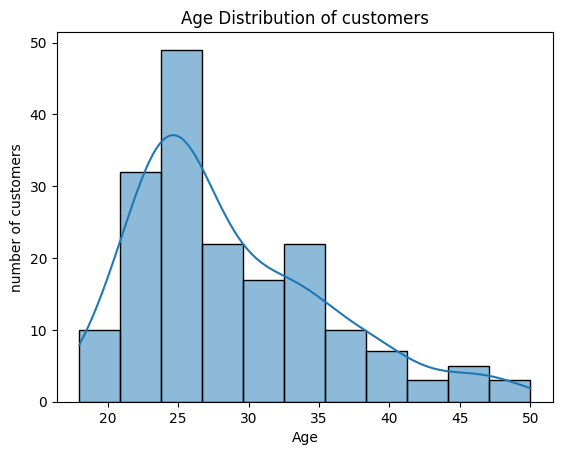

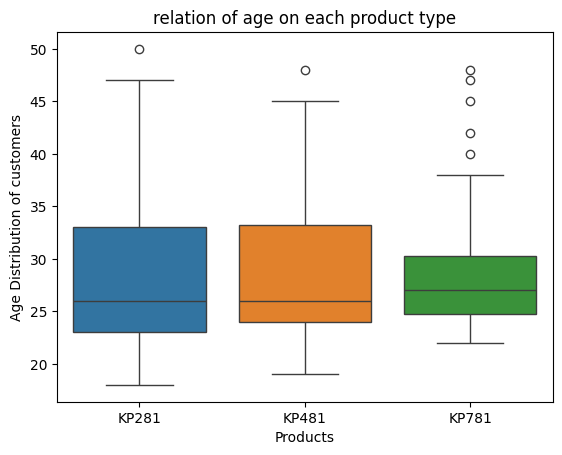


Average Age for each Treadmill Product:
 Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64


In [ ]:
#Age distribution of customers
sns.histplot(x=datadf['Age'],kde=True)
plt.title('Age Distribution of customers')
plt.ylabel('number of customers')
plt.show()

#Distribution of avg age on each products
sns.boxplot(x='Product',y='Age', hue='Product', data=datadf)
plt.title('relation of age on each product type')
plt.ylabel('Age Distribution of customers')
plt.xlabel('Products')

plt.show()

# Group by and calculate average age for each product
age_product_avg = df.groupby('Product')['Age'].mean()
print("\nAverage Age for each Treadmill Product:\n", age_product_avg)



By this Analysis we can see that the Customers among the age at 25 are more in this dataset.
And the age distributed among the products purchased lies in between the age bracket 23- 34 and we are able to see outliers for product KP781

we can also see that the younger people tend to buy KP281 model where as older customers tend to by KP781 model


3. Is there a significant difference in the income levels of customers purchasing different treadmill models?

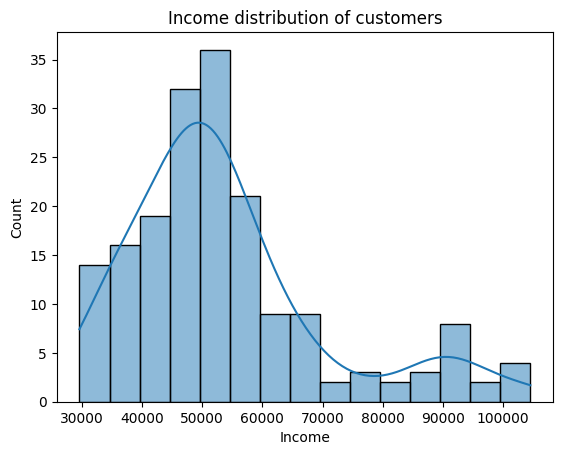

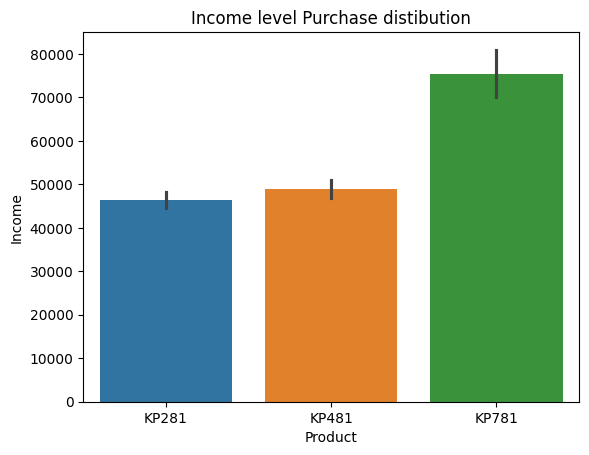


Average Income for each Treadmill Product:
 Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

Probability of purchasing KP281 given income > 75000:
nan


In [ ]:
#Income distribution
sns.histplot(df['Income'],kde=True)
plt.title('Income distribution of customers')
plt.show()

#Income level purchase distribution
sns.barplot(x='Product',y='Income', hue='Product', data=datadf)
plt.title('Income level Purchase distibution')
plt.show()

Avg_income_product = df.groupby('Product')['Income'].mean()
print("\nAverage Income for each Treadmill Product:\n", Avg_income_product)

#conditional probability
def conditional_probability(condition_col, condition_val, target_col, target_val):
    condition = df[condition_col] == condition_val
    return (df[condition][target_col] == target_val).mean()

print("\nProbability of purchasing KP281 given income > 75000:")
high_income_kp781 = conditional_probability('Income', 20000, 'Product', 'KP281')
print(high_income_kp781)

By This analysis we can see that the customers with salary ranging from 50k -60 k are more in number
And people with salary range <=50k tends to buy product KP281 and KP481 and people with salary greater than 50k tends to buy KP781

recommend Kp781 products to people first who has a higher salary may result in higher sales of KP781 compared to other two products

4. Correlation between fitness level and treadmill model purchased

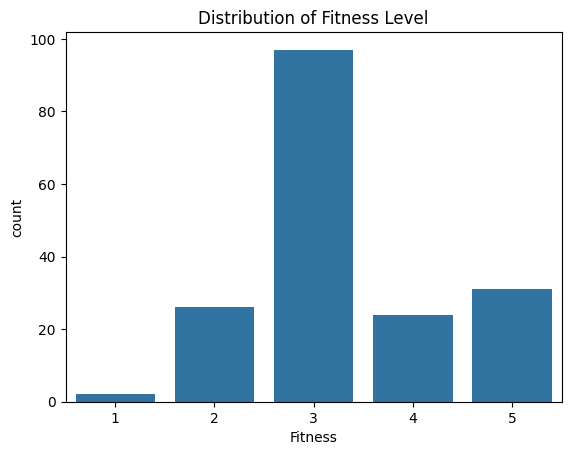

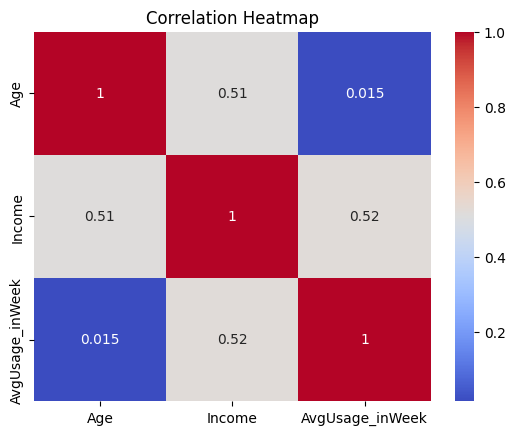

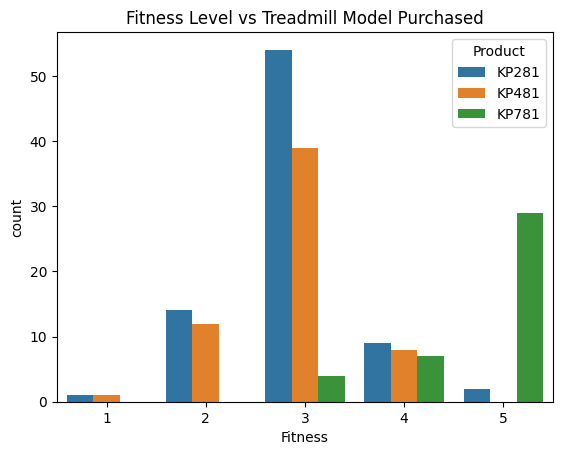


Correlation between Fitness Level and Product Purchased:
 Fitness    1         2         3         4         5
Product                                             
KP281    0.5  0.538462  0.556701  0.375000  0.064516
KP481    0.5  0.461538  0.402062  0.333333  0.000000
KP781    0.0  0.000000  0.041237  0.291667  0.935484


In [ ]:
#distribution of fitness level
sns.countplot(data=datadf, x='Fitness')
plt.title('Distribution of Fitness Level')
plt.show()

#corelation of all the continous variables
continuous_vars = ['Age', 'Income', 'AvgUsage_inWeek']

sns.heatmap(datadf[continuous_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#coreleation of fitness level to the treadmill  model purchased
sns.countplot(data=datadf, x='Fitness', hue='Product')
plt.title('Fitness Level vs Treadmill Model Purchased')
plt.show()
fitness_correlation = pd.crosstab(df['Product'], df['Fitness'], normalize='columns')
print("\nCorrelation between Fitness Level and Product Purchased:\n", fitness_correlation)




By this analysis we understand that the people with the fitness scroe of 3 are more and the people wityh fitness score at 3 are buying the KP281 entry level treadmill more and also this category of fitness is buying all the three products in avg

Secondly the people who are fit at 5 tends to buy kp781 treadmill more and not prefer to buy the cheaper version treadmill


5.Expected usage (times per week) differences among treadmill models

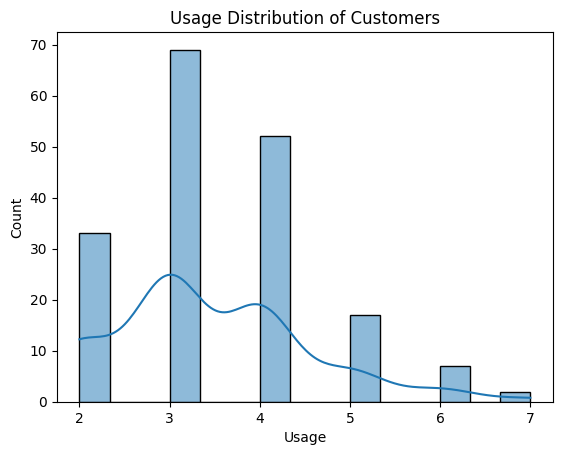

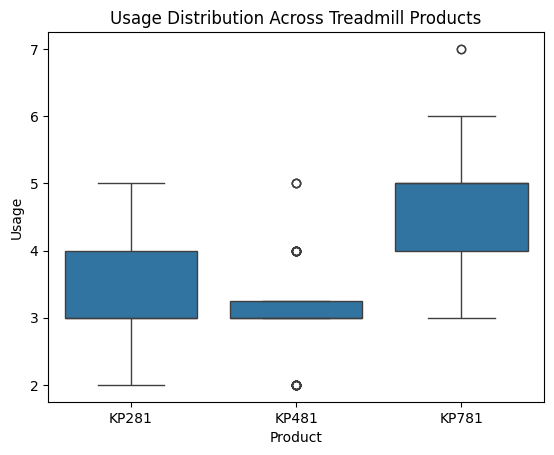


Average Usage (times per week) for each Treadmill Product:
 Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64


In [ ]:
# Univariate: Usage distribution
sns.histplot(datadf['Usage'], kde=True)
plt.title('Usage Distribution of Customers')
plt.show()

sns.boxplot(x='Product', y='Usage', data=datadf)
plt.title('Usage Distribution Across Treadmill Products')
plt.show()

# Group by and calculate average usage for each product
usage_product_avg = datadf.groupby('Product')['Usage'].mean()
print("\nAverage Usage (times per week) for each Treadmill Product:\n", usage_product_avg)

Outliers are detected for the Product KP481 whose usage frequency is out of the range and we can see the customers usage frequency that is more on the days 3 and 4

6.Probabibilty calcuations on data

In [ ]:
# Marginal Probability on product
marginal_prob = datadf['Product'].value_counts(normalize=True)
print("\nMarginal Probability of Product Purchase:")
print(marginal_prob)

#Marginal Probabbility on Age
marginal_age = datadf['Age'].value_counts(normalize=True)
print("\nMarginal Probability of Age :")
print(marginal_prob)

#Marginal probability on miles
marginal_age = datadf['Miles'].value_counts(normalize=True)
print("\nMarginal Probability of Miles :")
print(marginal_prob)

#print("\nProbability of being male given KP481 purchase:")
male_given_kp481 = conditional_probability('Product', 'KP481', 'Gender', 'Male')
print("Probability of male purchasing the KP481 treadmill",male_given_kp481)

#print("\nProbability of being female given KP481 purchase:")
female_given_kp481 = conditional_probability('Product', 'KP481', 'Gender', 'Female')
print("Probability of female purchasing the KP481 treadmill",female_given_kp481)




Marginal Probability of Product Purchase:
Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

Marginal Probability of Age :
Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

Marginal Probability of Miles :
Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64
Probability of male purchasing the KP481 treadmill 0.5166666666666667
Probability of female purchasing the KP481 treadmill 0.48333333333333334


By this analysis we can see the male and female purchase probability of kp481 treadmill.

7.Determine the Choice of treadmill based on Education level

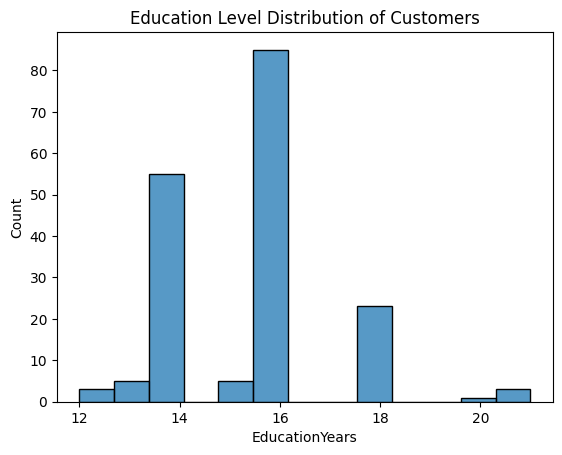

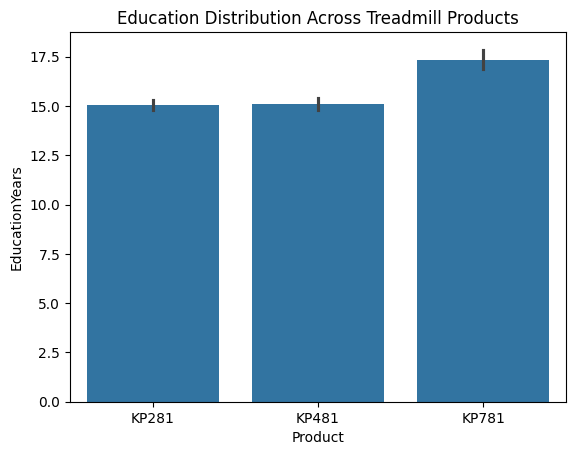

In [ ]:

# Univariate: Education level distribution
sns.histplot(datadf['EducationYears'])
plt.title('Education Level Distribution of Customers')
plt.show()

# Bivariate: Education vs Product Purchased
sns.barplot(x='Product', y='EducationYears', data=datadf)
plt.title('Education Distribution Across Treadmill Products')
plt.show()


People with More number of education years are 16 and 14 and we can observe that people whose education lies less than 15 are buying both KP281 and kp481 and only the people with Education >15 years are buying the kp781 highend model along with other two models

8. Effect of marital status on choice of treadmill model.

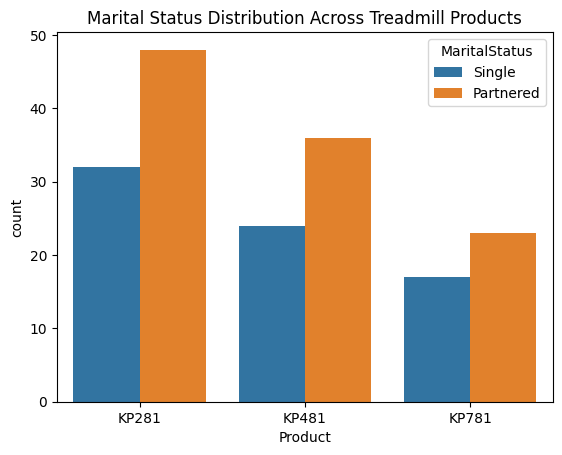

  Product  Gender  Count
0   KP281  Female     40
2   KP481  Female     29
4   KP781  Female      7


In [ ]:
# Bivariate: MaritalStatus vs Product Purchased
sns.countplot(x='Product', hue='MaritalStatus', data=datadf)
plt.title('Marital Status Distribution Across Treadmill Products')
plt.show()

#probability of Females buying each treadmil
product_gender_counts = datadf.groupby(['Product', 'Gender'])['Gender'].count().reset_index(name='Count')
female_counts = product_gender_counts[product_gender_counts['Gender'] == 'Female']
print(female_counts)


By this anaalysis we can see that people who are married try to stay fit on more basis and among the couples the purchase rate for KP281 is more and the kp781 is the least

9.9. Average number of miles expected to run/walk each week for each treadmill model

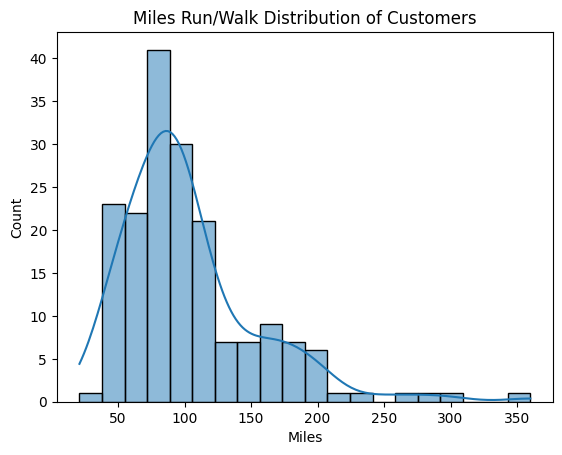

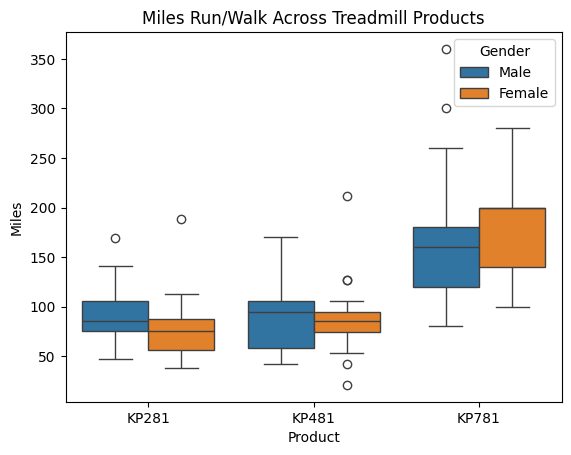


Average Miles per week for each Treadmill Product:
 Product
KP281     82.787500
KP481     87.933333
KP781    166.900000
Name: Miles, dtype: float64


In [ ]:
# Univariate: Miles distribution
sns.histplot(datadf['Miles'], kde=True)
plt.title('Miles Run/Walk Distribution of Customers')
plt.show()

# Bivariate: Miles vs Product Purchased
sns.boxplot(x='Product', y='Miles', hue='Gender', data=datadf)
plt.title('Miles Run/Walk Across Treadmill Products')
plt.show()

# Group by and calculate average miles for each product
miles_product_avg = datadf.groupby('Product')['Miles'].mean()
print("\nAverage Miles per week for each Treadmill Product:\n", miles_product_avg)

We can see that by this analysis , people tend to run more miles on the top end model where as least amount of miles in both the other models
we can also see that tere are some outliers when it comes to the miles customers ran


10.Outliers detection in the columns Age ,income and Miles and give the statistiical summary

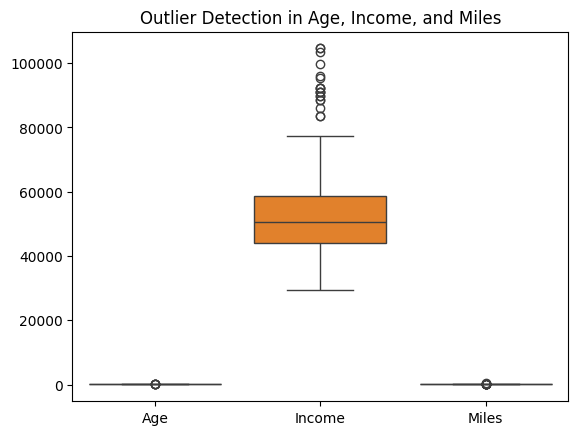

              Age         Income       Miles
count  180.000000     180.000000  180.000000
mean    28.788889   53719.577778  103.194444
std      6.943498   16506.684226   51.863605
min     18.000000   29562.000000   21.000000
25%     24.000000   44058.750000   66.000000
50%     26.000000   50596.500000   94.000000
75%     33.000000   58668.000000  114.750000
max     50.000000  104581.000000  360.000000
The Income column has more number of outliers


In [ ]:
# Boxplots for outlier detection
sns.boxplot(data=datadf[['Age', 'Income', 'Miles']])
plt.title('Outlier Detection in Age, Income, and Miles')
plt.show()
# describing the data..
print(datadf[['Age', 'Income', 'Miles']].describe())

print("The Income column has more number of outliers")

11.Difference in expected usage between male and female customers

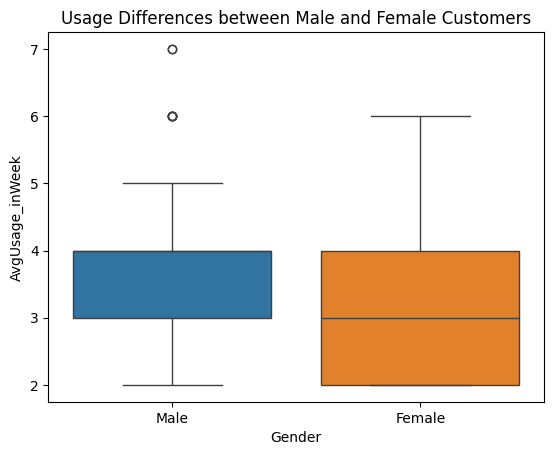


Average Usage per week by Gender:
 Gender
Female    3.184211
Male      3.653846
Name: AvgUsage_inWeek, dtype: float64


In [ ]:
sns.boxplot(x='Gender', y='AvgUsage_inWeek', hue='Gender', data=datadf)
plt.title('Usage Differences between Male and Female Customers')
plt.show()

# Group by gender and calculate average usage
usage_gender_avg = datadf.groupby('Gender')['AvgUsage_inWeek'].mean()
print("\nAverage Usage per week by Gender:\n", usage_gender_avg)

12. Correlation between age and expected miles to be run/walked

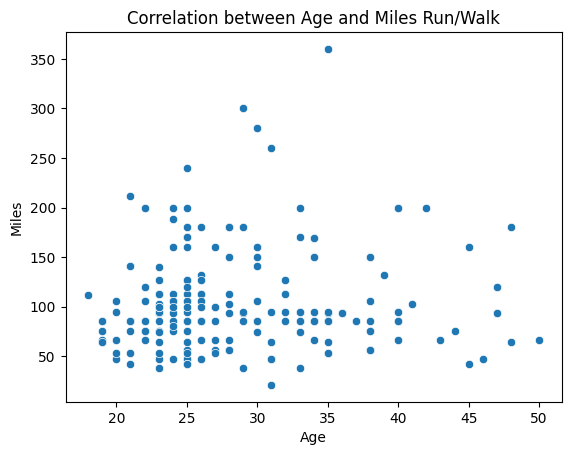


Correlation between Age and Miles:  0.0366175690582711


In [ ]:
# Bivariate: Age vs Miles
sns.scatterplot(x='Age', y='Miles', data=datadf)
plt.title('Correlation between Age and Miles Run/Walk')
plt.show()

# Correlation coefficient
age_miles_corr = datadf['Age'].corr(datadf['Miles'])
print("\nCorrelation between Age and Miles: ", age_miles_corr)

13. Marginal probability of having a fitness level of 4 or 5

In [ ]:
# Marginal probability calculation
prob_fitness_4_or_5 = len(datadf[datadf['Fitness'].isin([4, 5])]) / len(datadf)
print("\nMarginal probability of having a fitness level of 4 or 5: ", prob_fitness_4_or_5)


Marginal probability of having a fitness level of 4 or 5:  0.3055555555555556


14. Joint probability of being single and purchasing KP281

In [ ]:
# Joint probability calculation
joint_prob_single_kp281 = len(datadf[(datadf['MaritalStatus'] == 'Single') & (datadf['Product'] == 'KP281')]) / len(datadf)
print("\nJoint probability of being Single and purchasing KP281: ", joint_prob_single_kp281)



Joint probability of being Single and purchasing KP281:  0.17777777777777778


15.Probability of buying KP781 given income > $75,000

In [ ]:
# Conditional probability calculation
high_income_customers = datadf[datadf['Income'] > 75000]
prob_kp781_given_income = len(high_income_customers[high_income_customers['Product'] == 'KP781']) / len(high_income_customers)

print("\nProbability of purchasing KP781 given income > $75,000: ", prob_kp781_given_income)



Probability of purchasing KP781 given income > $75,000:  1.0


16.Recommendations

1.The aerofit must recommend the higher KP781 model to the people with higher  salary

2.People with having more miles should be recomended with the KP781 model

3,People with the less salary must be recomended with the Other two model rather than the kp781

4.Recommending KP781 more to males and KP281 to females

5.we can also see that the younger people tend to buy KP281 model where as older customers tend to by KP781 model and we should recomend on the same

6.we understand the people with fitness score at 3 are buying the KP281 entry level treadmill more and also this category of fitness is buying all the three products in avg

7. the people who are fit at 5 tends to buy kp781 treadmill more and not prefer to buy the cheaper version treadmill, we should recommed the same